In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

In [3]:
#carrega os arrays de imagens e de classes
X = np.load("D:/Displasia/displasiaDataAug/displasiaOriginalDataX_teste3.npy")
Y = np.load("D:/Displasia/displasiaDataAug/displasiaOriginalDataYOneHot_teste3.npy")
#dataX = np.load("Image Arrays/displasiaGeneratedDataX.npy")
#dataY = np.load("Image Arrays/displasiaGeneratedDataY.npy")

#shape dos arrays
X.shape, Y.shape

((75776, 32, 32, 3), (75776, 4))

In [4]:
from sklearn.model_selection import train_test_split

#divide os dados em 80% para treino e 20% para teste
train_X, test_X, train_label, test_label = train_test_split(X, Y, test_size=0.2, random_state=13)

#divide os dados de treino em 80% para treino e 20% para validação
train_X, valid_X, train_label, valid_label = train_test_split(train_X, train_label, test_size=0.2, random_state=13)

#mostra os shapes resultantes das divisões
print("Training:   ", train_X.shape, train_label.shape)
print("Validation: ", valid_X.shape, valid_label.shape)
print("Testing:    ", test_X.shape, test_label.shape)

Training:    (48496, 32, 32, 3) (48496, 4)
Validation:  (12124, 32, 32, 3) (12124, 4)
Testing:     (15156, 32, 32, 3) (15156, 4)


In [5]:
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.initializers import glorot_uniform
import scipy.misc

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

D:\Anaconda\envs\tf-gpu\lib\site-packages\tensorflow\python\keras\backend.py:435: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


In [6]:
model = tf.keras.applications.EfficientNetB1(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(32,32,3),
    pooling=None,
    classes=4,
    classifier_activation="softmax",
#    **kwargs
)

In [7]:
model.summary()

Model: "efficientnetb1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 32, 32, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 32, 32, 3)    7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 33, 33, 3)    0           normalization[0][0]              
_____________________________________________________________________________________

In [8]:
from tensorflow.keras import models
from tensorflow.keras import layers
#from tensorflow.keras.layers import Activation, Dense
#new_model = GlobalAveragePooling2D()(model)
#drop = Dropout(0.2)(new_model)
#new_model2 = Dense(4,activation='relu')(drop)

#new_model3 = Model(inputs=model.input, outputs=new_model)
#layers.GlobalAveragePooling2D(
#    data_format=None, keepdims=False, #**kwargs
#)

new_model = models.Sequential()
new_model.add(model)
new_model.add(layers.GlobalAveragePooling2D())
new_model.add(Flatten())
new_model.add(layers.Dropout(0.5))
new_model.add(Dense(4,activation='softmax'))

In [9]:

#model.build(input_shape)
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb1 (Functional)  (None, 1, 1, 1280)        6575239   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 4)                 5124      
Total params: 6,580,363
Trainable params: 6,518,308
Non-trainable params: 62,055
_________________________________________________________________


In [10]:
batch_size = 50
epochs = 70
num_classes = 4

#compila e treina o modelo com os dados carregados
new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_train = new_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label),shuffle=True)

Epoch 1/70
970/970 [==============================] - 97s 84ms/step - loss: 0.7370 - accuracy: 0.7040 - val_loss: 0.3597 - val_accuracy: 0.8615
Epoch 2/70
970/970 [==============================] - 85s 87ms/step - loss: 0.3785 - accuracy: 0.8570 - val_loss: 0.2774 - val_accuracy: 0.8973
Epoch 3/70
970/970 [==============================] - 87s 90ms/step - loss: 0.2796 - accuracy: 0.8967 - val_loss: 0.2375 - val_accuracy: 0.9167
Epoch 4/70
970/970 [==============================] - 86s 88ms/step - loss: 0.2314 - accuracy: 0.9171 - val_loss: 0.2404 - val_accuracy: 0.9174
Epoch 5/70
970/970 [==============================] - 78s 81ms/step - loss: 0.1950 - accuracy: 0.9299 - val_loss: 0.1261 - val_accuracy: 0.9536
Epoch 6/70
970/970 [==============================] - 79s 82ms/step - loss: 0.1598 - accuracy: 0.9432 - val_loss: 0.2056 - val_accuracy: 0.9235
Epoch 7/70
970/970 [==============================] - 79s 81ms/step - loss: 0.1565 - accuracy: 0.9471 - val_loss: 0.1051 - val_accuracy:

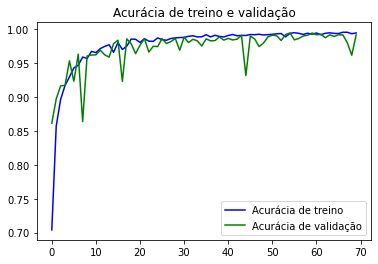

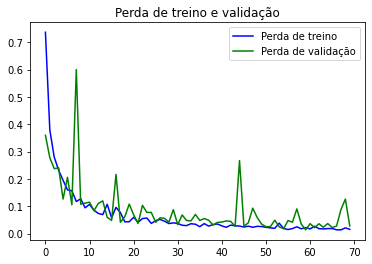

In [11]:
import matplotlib.pyplot as plt

#mostra os gráficos de acurácia e perda da fase de treino

accuracy = model_train.history['accuracy']
val_accuracy = model_train.history['val_accuracy']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Acurácia de treino')
plt.plot(epochs, val_accuracy, 'g', label='Acurácia de validação')
plt.title('Acurácia de treino e validação')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Perda de treino')
plt.plot(epochs, val_loss, 'g', label='Perda de validação')
plt.title('Perda de treino e validação')
plt.legend()
plt.show()

In [12]:
#avalia a fase de teste

test_eval = new_model.evaluate(test_X, test_label, verbose=1)

#mostra o resultado
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

474/474 [==============================] - 12s 25ms/step - loss: 0.0221 - accuracy: 0.9925
Test loss: 0.022148022428154945
Test accuracy: 0.9924782514572144


In [13]:
#faz a predição das imagens

from keras.utils import to_categorical

predicted_classes = new_model.predict(test_X)

predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

predicted_classes = to_categorical(predicted_classes)

predicted_classes.shape, test_label.shape

((15156, 4), (15156, 4))

In [14]:
#mostra as estatísticas de cada classe
num_classes = 4

from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_label, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00      3802
     Class 1       0.98      1.00      0.99      3812
     Class 2       1.00      0.98      0.99      3755
     Class 3       1.00      1.00      1.00      3787

   micro avg       0.99      0.99      0.99     15156
   macro avg       0.99      0.99      0.99     15156
weighted avg       0.99      0.99      0.99     15156
 samples avg       0.99      0.99      0.99     15156



In [15]:
from sklearn.metrics import confusion_matrix

#converte os arrays de classe de one-hot para númerico
test_label = np.argmax(test_label, axis=1)
predicted_classes = np.argmax(predicted_classes, axis=1)

#gera a matriz de confusão a partir da predição feita
cm = confusion_matrix(test_label, predicted_classes)

#gera os valores de falso positivo, falso negativo, verdadeiro positivo e verdadeiro negativo
fp = cm.sum(axis=0) - np.diag(cm)  
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.sum() - (fp + fn + tp)

#gera a sensitividade, especificidade, acurácia e precisão
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
accuracy    = (tp + tn) / (tp + tn + fp + fn)
precision   = tp / (tp + fp)
f1_score = 2/((1/precision)+(1/sensitivity))

#mostra os resultados
print("Precision:  ", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:   ", f1_score)
print("Accuracy:   ", accuracy)

Sensitivity: [0.99736981 0.99711438 0.9792277  0.99577502]
Specificity: [0.9992954  0.9922426  0.99912288 0.99920837]
Precision:   [0.99789474 0.97737208 0.99728777 0.99761905]
Accuracy:    [0.99881235 0.99346793 0.99419372 0.99835049]
F1-score:  [0.9976322  0.98714453 0.98817522 0.99669618]


In [16]:
new_model.save("D:/Modelos/EfficientNet_B1_IMAGENET_IC_SCM3")

D:\Anaconda\envs\tf-gpu\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: D:/Modelos/EfficientNet_B1_IMAGENET_IC_SCM3\assets
